In [23]:
import pandas as pd
import numpy as np
import random

%matplotlib inline



In [13]:
df = pd.DataFrame(np.random.randn(1000,4), columns = ['a', 'b', 'c', 'd'])



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11beae1d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11ce6ed68>]], dtype=object)

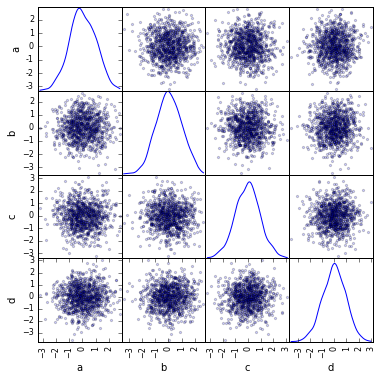

In [19]:
pd.tools.plotting.scatter_matrix(df, alpha=0.2, figsize=(6,6), diagonal='kde')



In [20]:
import seaborn as sns

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11e196198>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11e820a90>]], dtype=object)

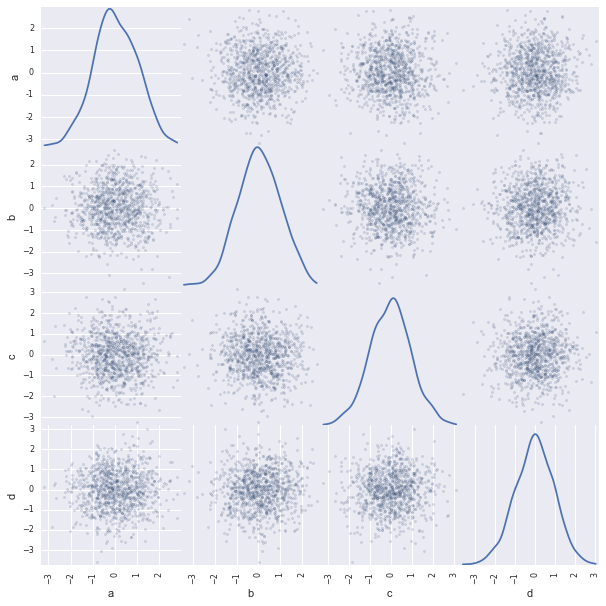

In [22]:
pd.tools.plotting.scatter_matrix(df, alpha=0.2, figsize=(10,10), diagonal='kde')



In [48]:
sns.set(style='darkgrid')

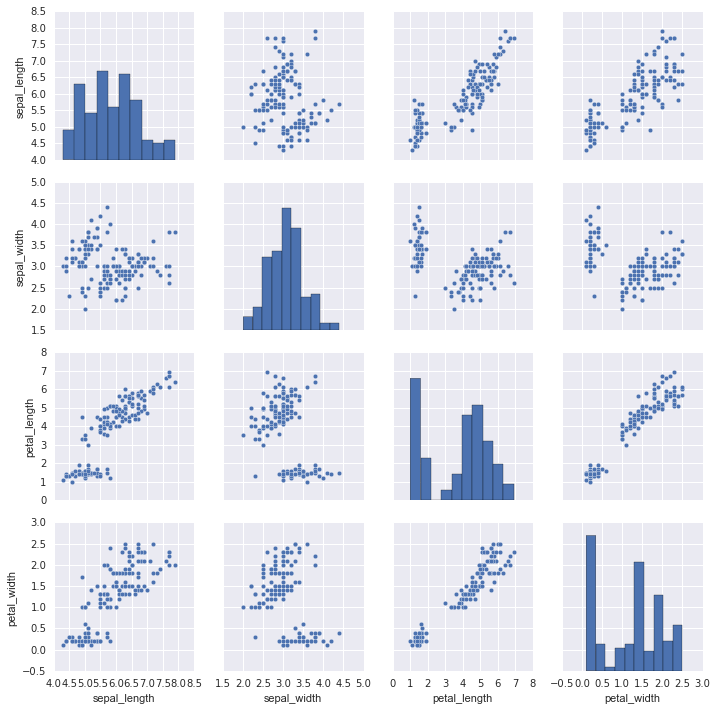

In [49]:
df_i = sns.load_dataset('iris')
sns.pairplot(df_i)

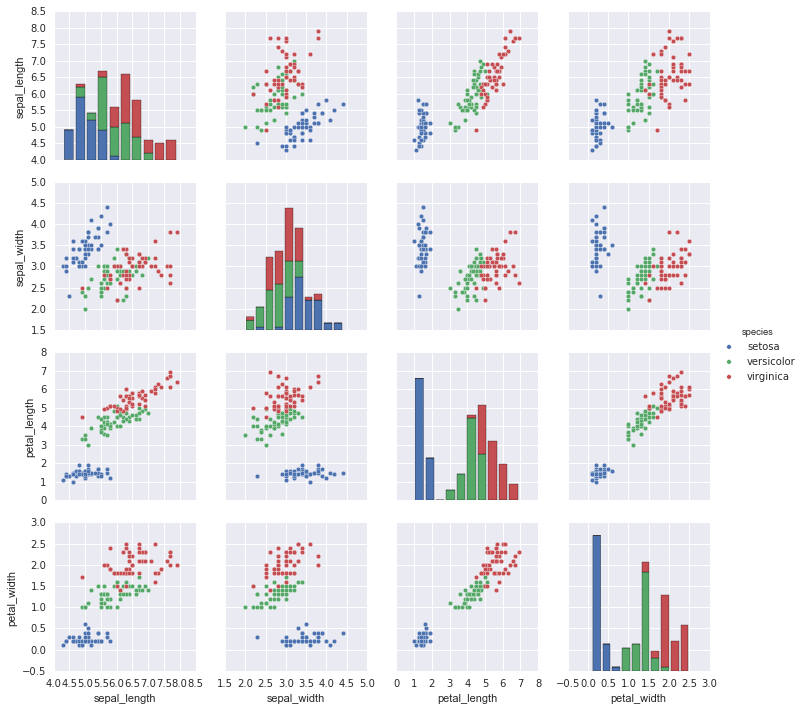

In [50]:
sns.pairplot(df_i, hue='species')

In [25]:
df_i.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11f8de208>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x12032d588>]], dtype=object)

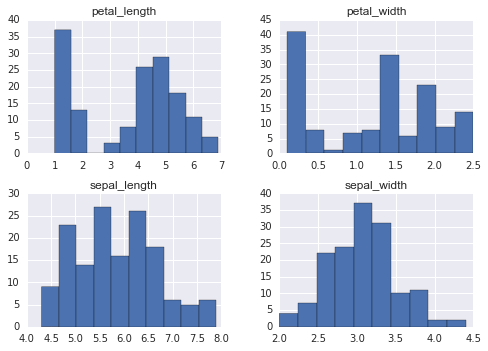

In [26]:

df_i.hist()

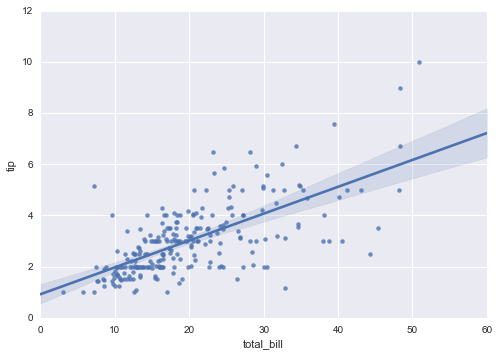

In [9]:
import seaborn as sns
tips = sns.load_dataset('tips')
ax = sns.regplot(x='total_bill', y='tip', data=tips)

NameError: name 'df_i' is not defined

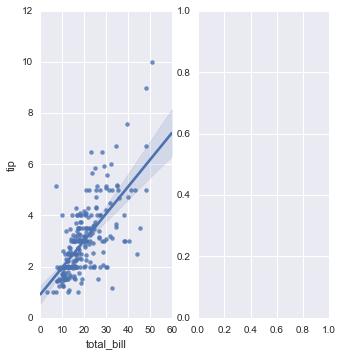

In [10]:
import matplotlib.pyplot as pyplt
import seaborn as sns

tips = sns.load_dataset('tips')
pyplt.subplot(1,3,1)
ax1 = sns.regplot(x='total_bill', y='tip', data=tips)

pyplt.subplot(1,3,2)
ax2 = sns.regplot(x='petal_length', y='petal_width', data=df_i)

pyplt.subplot(1,3,3)
ax2 = sns.regplot(x='petal_length', y='sepal_width', data=df_i)

#more concise way would be
#fig, ax = pyplt.subplot(133)

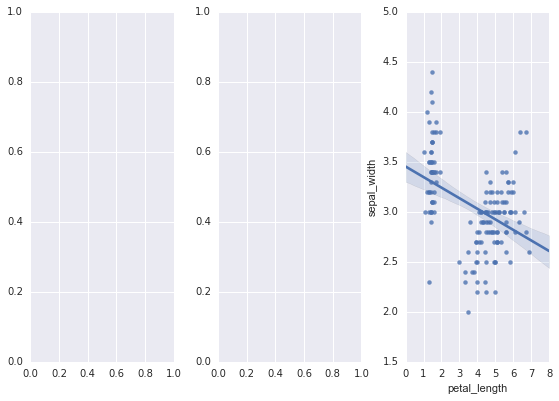

In [79]:
#http://stackoverflow.com/questions/34162443/why-do-many-examples-use-fig-ax-plt-subplots-in-matplotlib-pyplot-python

fig, ax = pyplt.subplots(1,3)
fig.tight_layout()

ax[1] = sns.regplot(x='petal_length', y='sepal_width', data=df_i)

In [91]:
"""
#3.2.R1
We run a linear regression and the slope estimate is 0.5 with estimated standard error of 0.2. What is the largest value of b for which we would NOT reject the null hypothesis that β1=b? (assume normal approximation to t distribution, and that we are using the 5% significance level for a two-sided test; need two significant digits of accuracy)
#ans 0.892, b/c highest bound of CI
"""

slope = .5
se_hat = .2

print(1.96*(se_hat))

ci_p = slope + 1.96*se_hat
ci_m = slope - 1.96*se_hat

result = ci_p, ci_m
print(result)

0.392
(0.892, 0.10799999999999998)


In [87]:
slope = .08

print(2*(se_hat**2))

ci_p = slope + 2*se_hat**2
ci_m = slope - 2*se_hat**2


result = ci_p, ci_m
print(result)

0.08000000000000002
(0.16000000000000003, -1.3877787807814457e-17)


In [94]:
np.sqrt(.4)

0.63245553203367588

In [95]:
np.sqrt(.6)

0.7745966692414834

In [98]:
df_i.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


In [34]:

ads = pd.read_csv('data/Advertising.csv'
                  , usecols=[1,2,3,4]
                  , header=0
                  , names = ['TV', 'Radio', 'Newspaper', 'Sales'])

In [35]:
ads.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [36]:
ads.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


In [37]:
import statsmodels.api as sm

In [38]:
ads[['TV', 'Radio']].head()

,TV,Radio
0,230.1,37.8
1,44.5,39.3
2,17.2,45.9
3,151.5,41.3
4,180.8,10.8


In [39]:
ads['intercept'] = np.ones((len(ads), ))

In [40]:
myresult = sm.OLS(ads['Sales'], ads[['intercept', 'TV', 'Radio', 'Newspaper']]).fit()

In [41]:
myresult.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sun, 24 Jul 2016   Prob (F-statistic):           1.58e-96
Time:                        19:23:36   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
intercept      2.9389      0.312      9.422      0.000         2.324     3.554
TV             0.0458      0.001     32.809      0.000         0.043     0.049
Radio          0.1885      0.009     21.893      0.000         0.172     0.206
Newspaper     -0.0010      0.006     -0.177      0.860        -0.013     0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

notice how little affect of newspaper. and how high the corr between newspaper and radio


In [110]:
credit = pd.read_csv('data/Credit.csv')
credit.drop(['here'], inplace=True, axis=1)
credit.head()


,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11853d940>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x118b9a710>]], dtype=object)

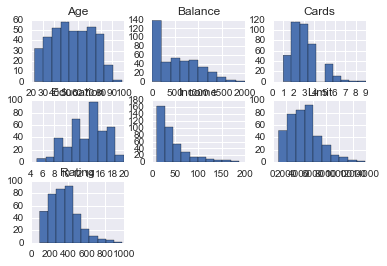

In [55]:
credit.hist()

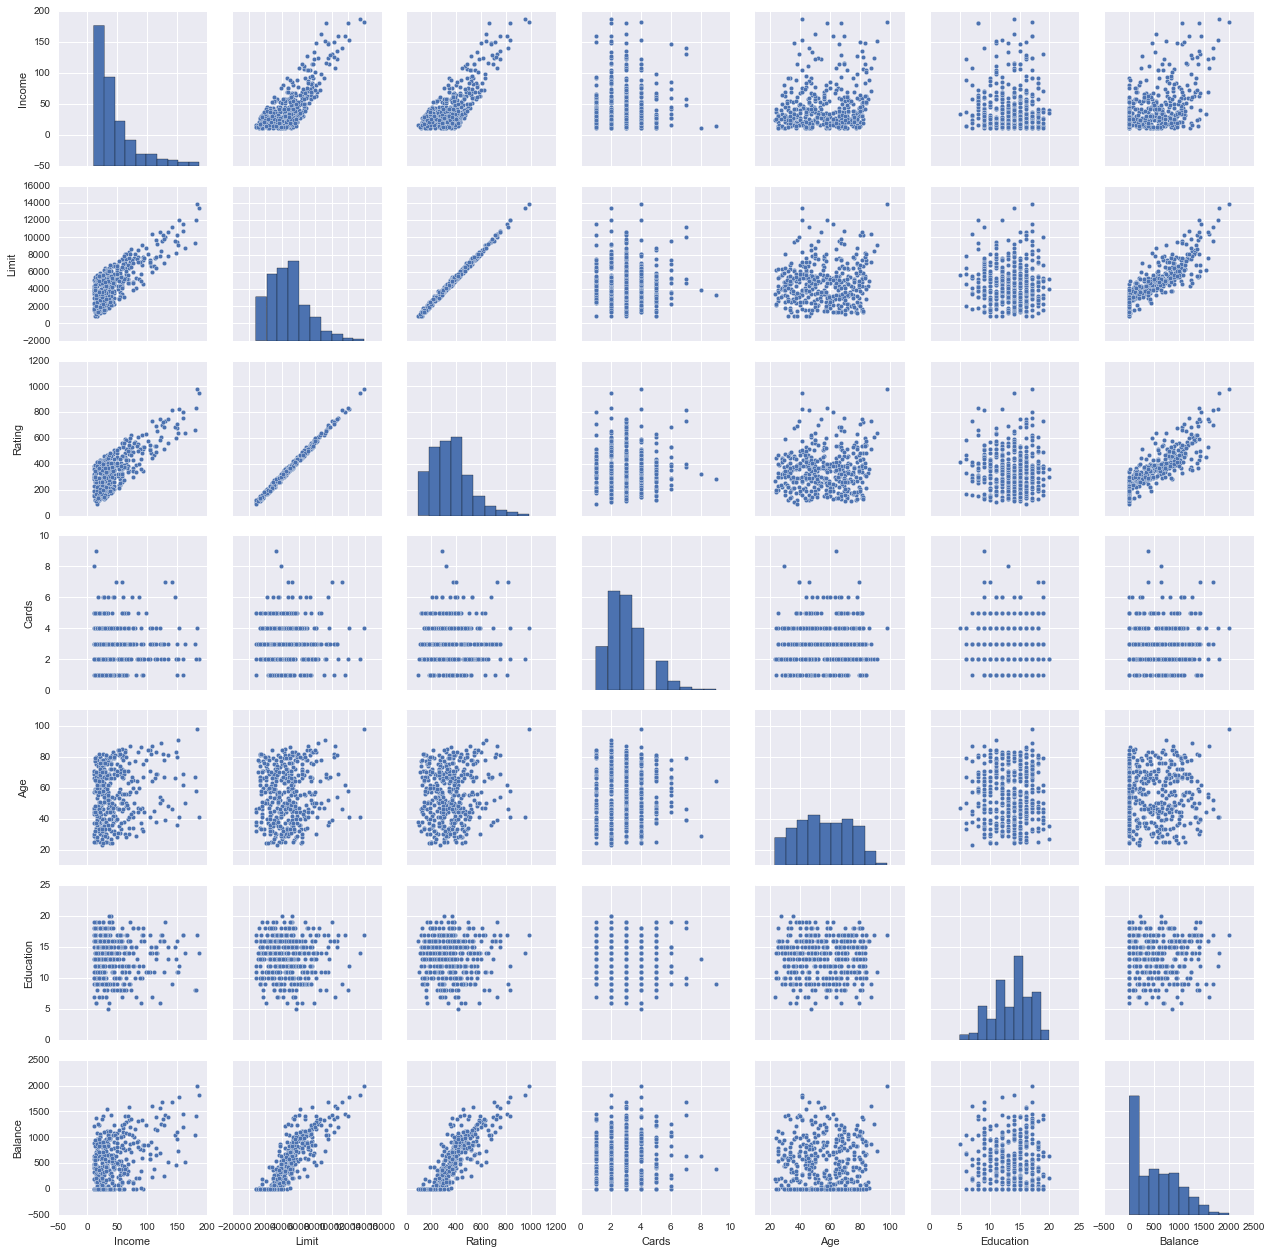

In [59]:
sns.pairplot(credit)

In [61]:
credit.corr()

,Income,Limit,Rating,Cards,Age,Education,Balance
Income,1.000000,0.792088,0.791378,-0.018273,0.175338,-0.027692,0.463656
Limit,0.792088,1.000000,0.996880,0.010231,0.100888,-0.023549,0.861697
Rating,0.791378,0.996880,1.000000,0.053239,0.103165,-0.030136,0.863625
Cards,-0.018273,0.010231,0.053239,1.000000,0.042948,-0.051084,0.086456
Age,0.175338,0.100888,0.103165,0.042948,1.000000,0.003619,0.001835
Education,-0.027692,-0.023549,-0.030136,-0.051084,0.003619,1.000000,-0.008062
Balance,0.463656,0.861697,0.863625,0.086456,0.001835,-0.008062,1.000000


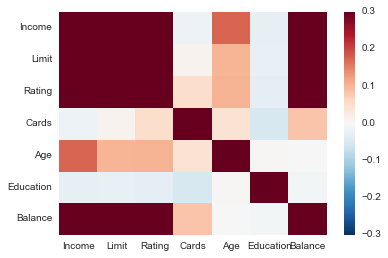

In [64]:
sns.heatmap(credit.corr(), vmax=.3)

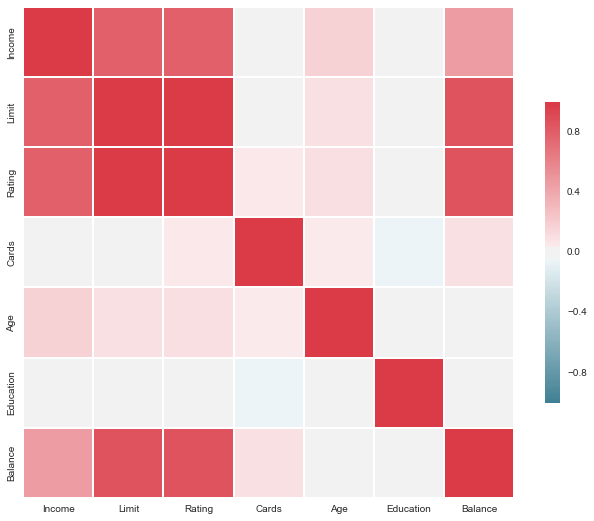

In [79]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
pyplt.figure(figsize=(11,9))
sns.heatmap(credit.corr(), cmap=cmap, square=True, cbar_kws={'shrink': .6}, linewidths=1)

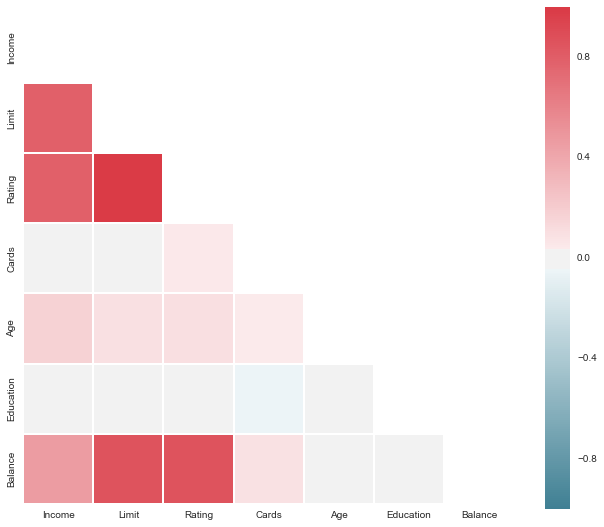

In [88]:
sns.set(style='white')
mask = np.zeros_like(credit.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


cmap = sns.diverging_palette(220, 10, as_cmap=True)
pyplt.figure(figsize=(11,9))
sns.heatmap(credit.corr(),mask=mask,  cmap=cmap, square=True, linewidths=1)

In [84]:
mask[np.triu_indices_from(mask)] = True


In [85]:
mask

array([[ True,  True,  True,  True,  True,  True,  True],
       [False,  True,  True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True,  True],
       [False, False, False, False,  True,  True,  True],
       [False, False, False, False, False,  True,  True],
       [False, False, False, False, False, False,  True]], dtype=bool)

credit.head()

In [111]:
credit.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [103]:
X_credit = credit.copy()


In [104]:
X_credit['dum_female'] = X_credit['Gender'] == 'Female'
X_credit['dum_female'] = X_credit['dum_female'].astype(int)
X_credit['intercept'] = 1

In [108]:
credit_ols = sm.OLS(X_credit['Balance'], X_credit[['intercept', 'dum_female']]).fit()
credit_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.1836
Date:                Sun, 24 Jul 2016   Prob (F-statistic):              0.669
Time:                        20:08:48   Log-Likelihood:                -3019.3
No. Observations:                 400   AIC:                             6043.
Df Residuals:                     398   BIC:                             6051.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
intercept    509.8031     33.128     15.389      0.000       444.675   574.931
dum_female    19.7331     46.051      0.429      0.669       -70.801   110.267
==============================================================================
Omnibus:                       28.438   Durbin-Watson:                   1.940
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.346
Skew:                           0.583   Prob(JB):                     1.15e-06
Kurtosis:                       2.471   Cond. No.                         2.66
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

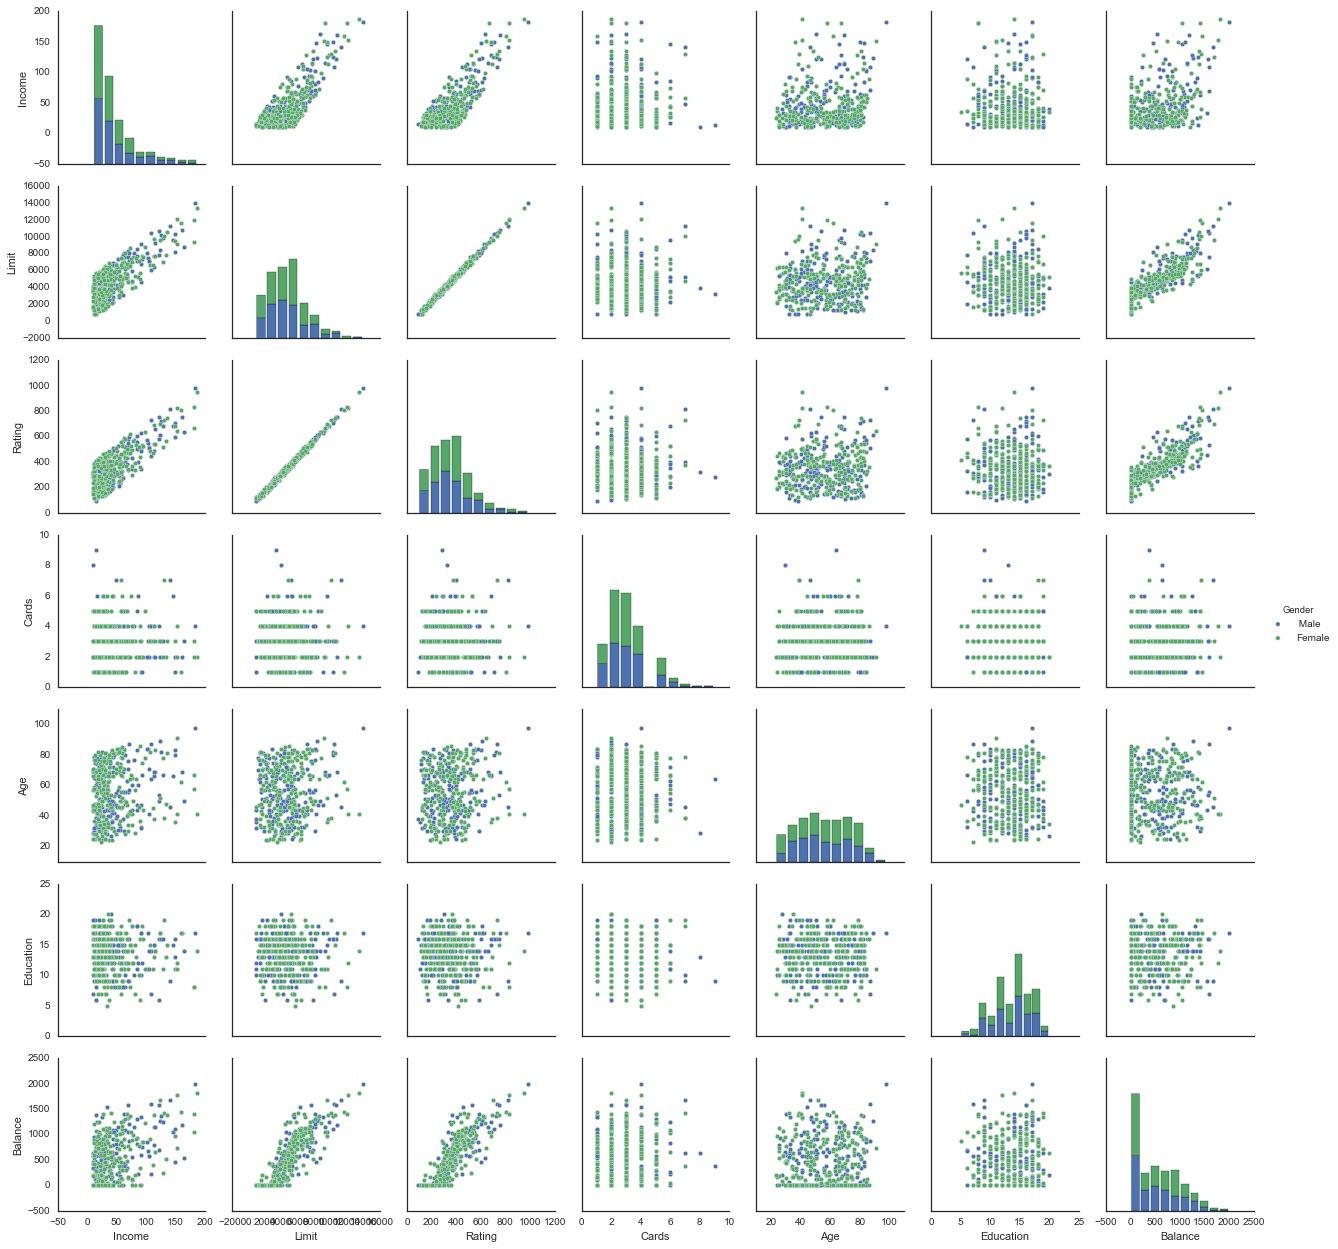

In [113]:
sns.pairplot(credit, hue='Gender')

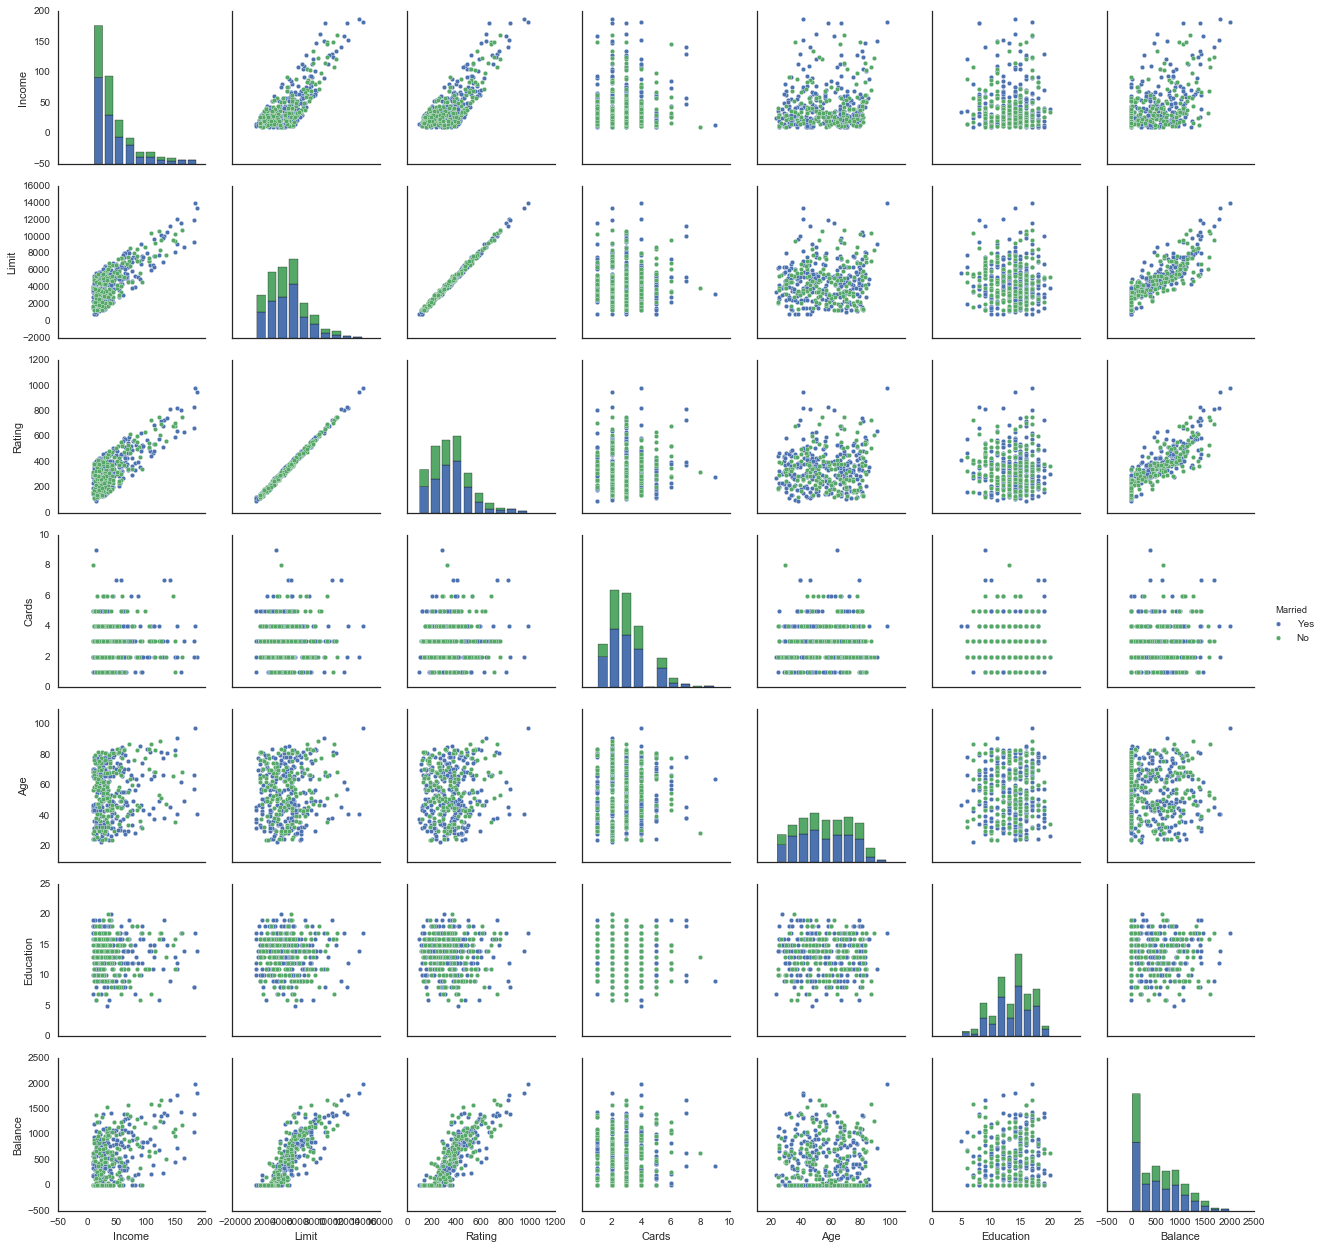

In [114]:
sns.pairplot(credit, hue='Married')

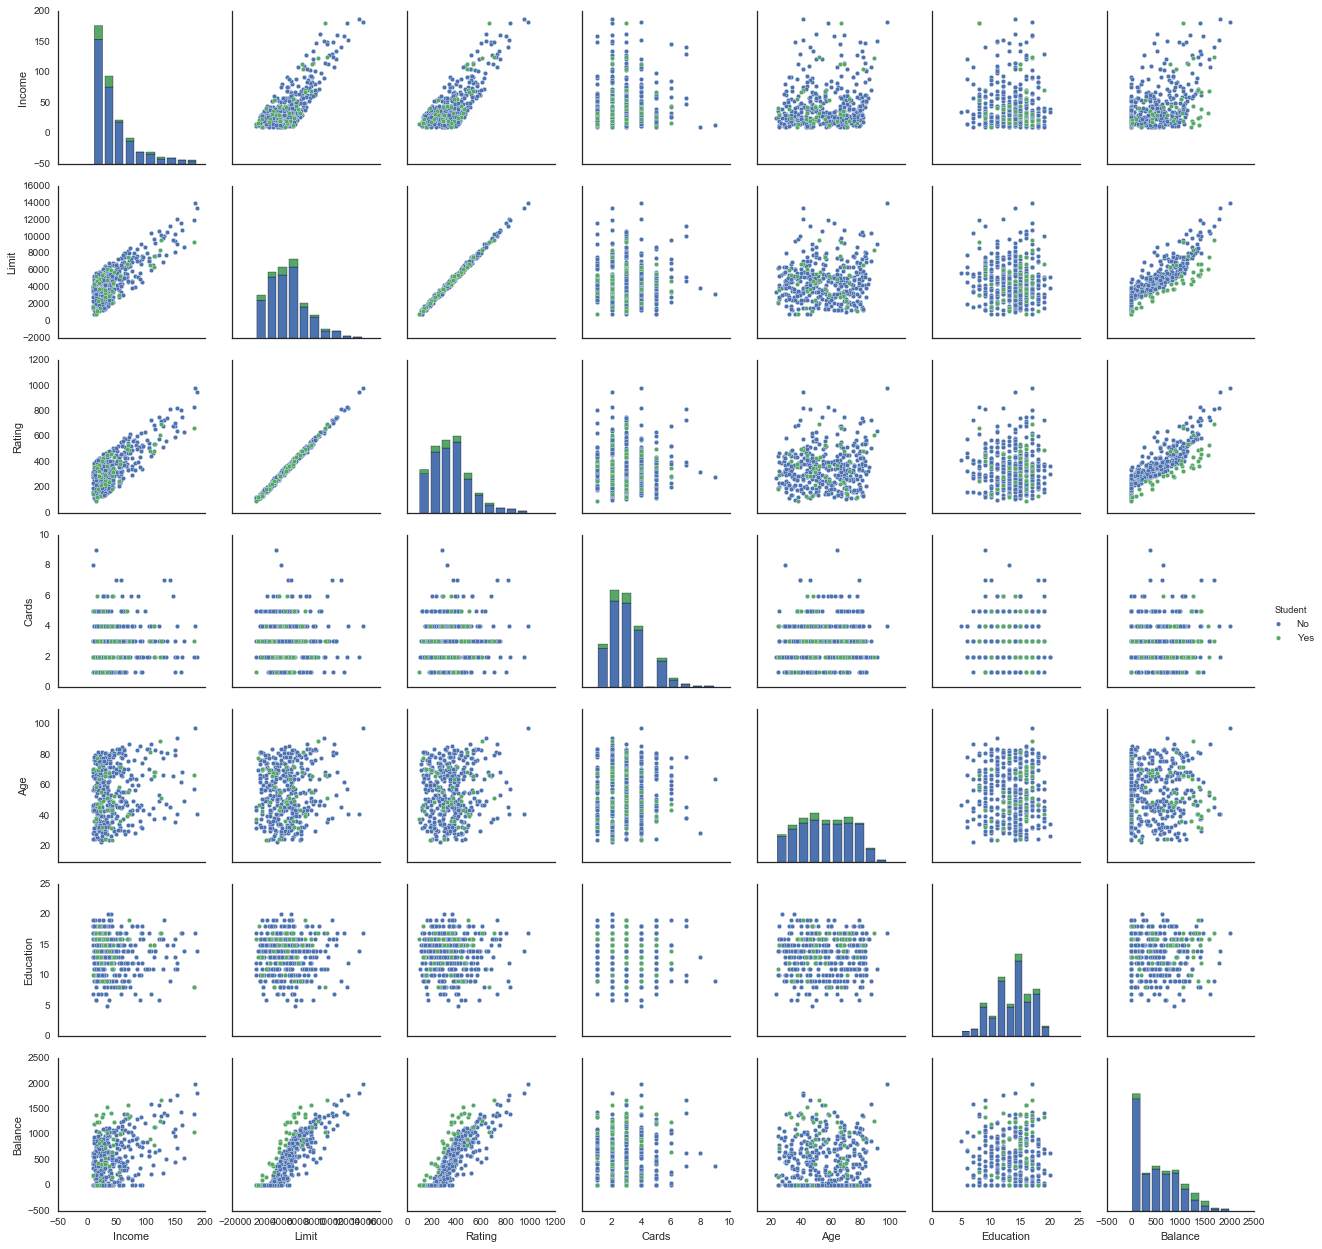

In [115]:
sns.pairplot(credit, hue='Student')

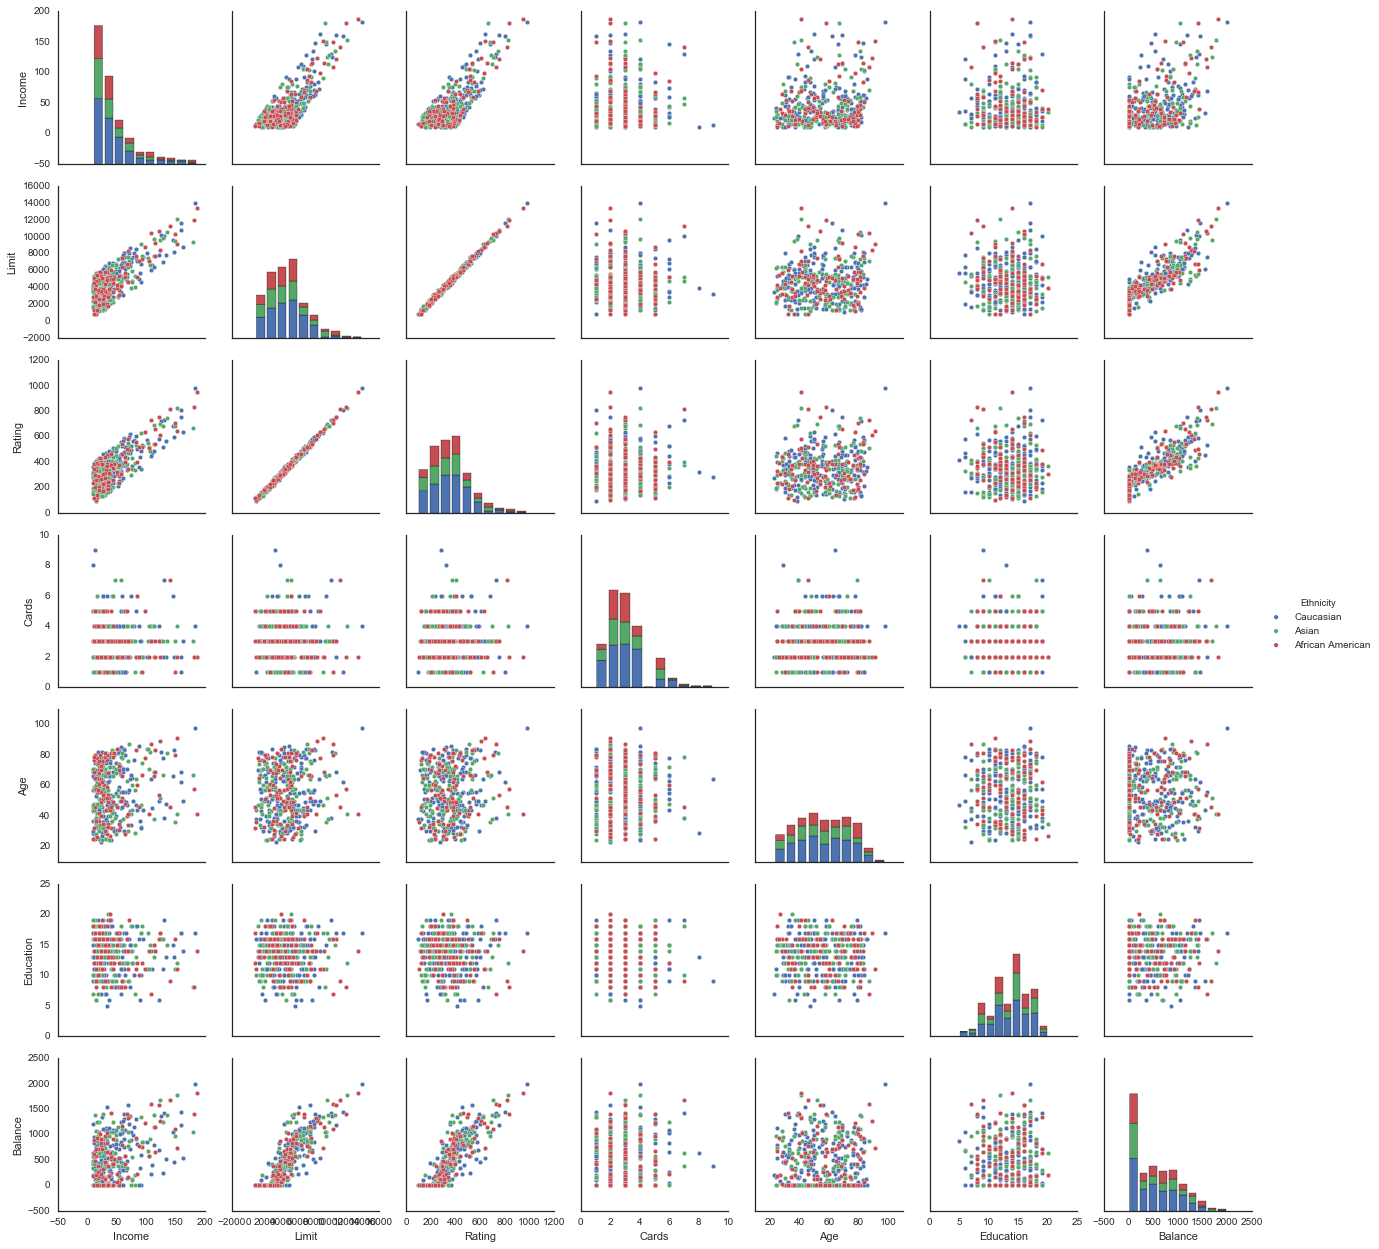

In [116]:
sns.pairplot(credit, hue='Ethnicity')

In [120]:
#for ethnicity, add in more dummy variables for more 

X_credit['Asian'] = X_credit['Ethnicity'] == 'Asian'
X_credit['Caucasian'] = X_credit['Ethnicity'] == 'Caucasian'

X_credit['Asian'] = X_credit['Asian'].astype(int)
X_credit['Caucasian'] = X_credit['Caucasian'].astype(int)

credit_ethn = sm.OLS(X_credit['Balance'], X_credit[['intercept', 'Asian', 'Caucasian']]).fit()
credit_ethn.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                   0.04344
Date:                Sun, 24 Jul 2016   Prob (F-statistic):              0.957
Time:                        20:18:37   Log-Likelihood:                -3019.3
No. Observations:                 400   AIC:                             6045.
Df Residuals:                     397   BIC:                             6057.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
intercept    531.0000     46.319     11.464      0.000       439.939   622.061
Asian        -18.6863     65.021     -0.287      0.774      -146.515   109.142
Caucasian    -12.5025     56.681     -0.221      0.826      -123.935    98.930
==============================================================================
Omnibus:                       28.829   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.395
Skew:                           0.581   Prob(JB):                     1.13e-06
Kurtosis:                       2.460   Cond. No.                         4.39
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [121]:

531-18.69

512.31